<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-component-analysis-(PCA)-in-scikit-learn" data-toc-modified-id="Principal-component-analysis-(PCA)-in-scikit-learn-1">Principal component analysis (PCA) in scikit-learn</a></span></li><li><span><a href="#Visually-compare-original-data-to-components" data-toc-modified-id="Visually-compare-original-data-to-components-2">Visually compare original data to components</a></span></li><li><span><a href="#Bonus-Visualizations" data-toc-modified-id="Bonus-Visualizations-3">Bonus Visualizations</a></span></li></ul></div>

Principal component analysis (PCA) in scikit-learn
-----

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from warnings import filterwarnings
filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [3]:
# Let's try it our favorite dataset
from sklearn.datasets import load_iris

# We just need the features (no need for targets)
X = load_iris().data

In [4]:
# TODO: Import StandardScaler, Pipeline, PCA

In [5]:
## A solution

from sklearn.decomposition import PCA
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
# TODO: Fit multiple PCAs with the following number of components: [1, 2, 3, 4] 
# Note PCA takes in a random_state number. Set it to 42 so we can compare answers between ourselves.


In [7]:
## A solution

results = {}
for n_components in range(1, 5):
    pipe = Pipeline([('scalar', StandardScaler()),
                     ('pca',    PCA(n_components=n_components, random_state=42)),
                ])
    pipe.fit(X);
    results[n_components] = pipe

In [8]:
# TODO:
# Visually inspect the percentage of variance accounted for as a funciton of the number of components.
# What happens as there are more components? 
# In particular, how do the smaller principal components change as more components are added?
# How much variance is accounted for when the number of compenents is 4? What does that mean?




[0.72962445]
[0.72962445 0.22850762]
[0.72962445 0.22850762 0.03668922]
[0.72962445 0.22850762 0.03668922 0.00517871]

100% variance explained when number of components equal p.


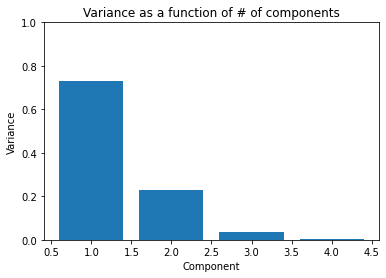

In [9]:
## A solution
for pca_current in results.values():
    explained_variance_ratio_ = pca_current['pca'].explained_variance_ratio_
    print(explained_variance_ratio_)
print()
    
# We get dimnishing returns 
plt.bar(x=[1, 2, 3, 4], height=explained_variance_ratio_);
plt.title("Variance as a function of # of components");plt.ylim(top=1);plt.xlabel("Component");plt.ylabel("Variance")


# Since the components are orthogonal, the variance is unique and it sums to one (or close enough) when it equals p.
print(f"{sum(explained_variance_ratio_):.0%} variance explained when number of components equal p.")

Visually compare original data to components
-----

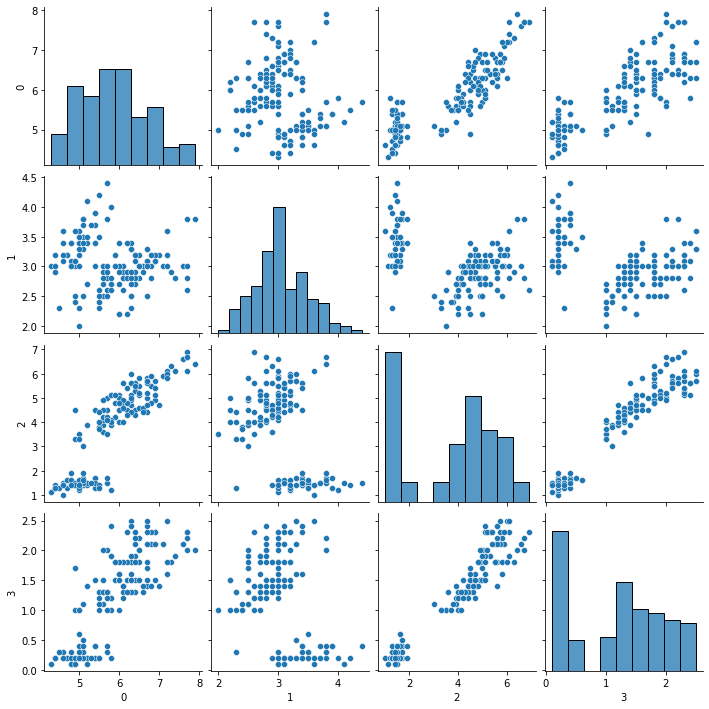

In [10]:
# Pretty plot the original data
sns.pairplot(pd.DataFrame(X), size=2.5, palette=palette);

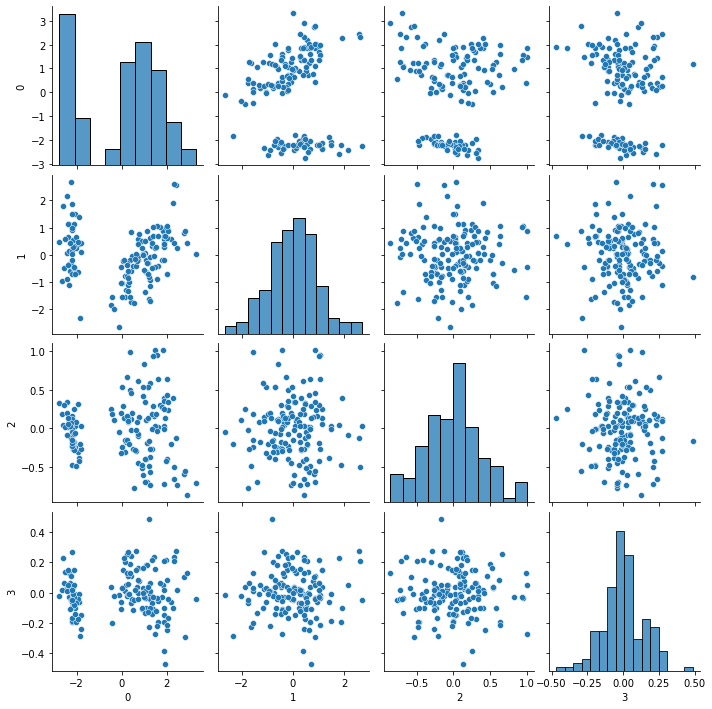

In [11]:
# Pretty plot the components
X_transform_from_pca = pipe.transform(X)
sns.pairplot(pd.DataFrame(X_transform_from_pca), size=2.5, palette=palette);

Bonus Visualizations
-----

Play with 3d rotation:
https://plotly.com/python/pca-visualization/#visualize-pca-with-pxscatter3d

In [13]:
# ! pip install mlxtend # Not in orgrinal environment. It is now if you want to updata environment.

     |████████████████████████████████| 1.3 MB 1.4 MB/s eta 0:00:01


In [14]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np

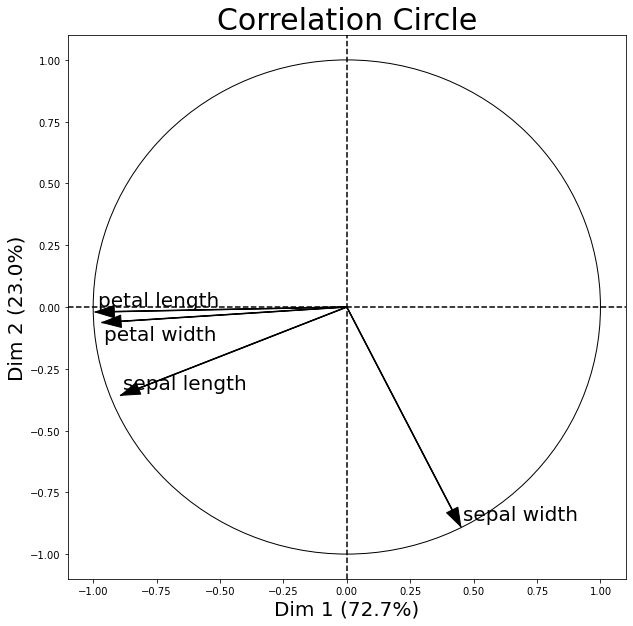

In [18]:
X, _ = iris_data()

feature_names = [
  'sepal length',
  'sepal width',
  'petal length',
  'petal width']

figure, correlation_matrix = plot_pca_correlation_graph((X / X.std(axis=0)), # Standardize features
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

In [19]:
correlation_matrix

,Dim 1,Dim 2
sepal length,-0.891224,-0.357352
sepal width,0.449313,-0.888351
petal length,-0.991684,-0.020247
petal width,-0.964996,-0.062786


[Source](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/)